<div style="background-color:#3b5998; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b> Brain Tumor detection</b></h1>
</div>

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
pip install -q opencv-python tensorflow numpy pandas seaborn matplotlib scikit-learn pydot graphviz

In [2]:
import os
import cv2
import tensorflow as tf
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from keras.utils import plot_model
from tensorflow import keras
import warnings
from IPython.display import HTML, display
warnings.filterwarnings("ignore")

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PREPARATION</b></h2>
</div>

In [3]:
def read_images(folder_path,image_size =(256,256)):
    image_list = []
    label_list = []

    for root, subdirs, files in os.walk(folder_path):
        for subdir in subdirs:
            label = subdir

            subdir_path = os.path.join(root, subdir)
            for file in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, file)

                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, image_size)

                image_list.append(image)
                label_list.append(label)
    images = np.array(image_list)
    labels = np.array(label_list)

    return images, labels


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip -u "/content/drive/MyDrive/MRI DATASET.zip" -d "/content/NewFolder"

Streaming output truncated to the last 5000 lines.
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/NewFolder/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/NewFolder/Trainin

In [6]:
testing_images , testing_labels  = read_images(r"/content/NewFolder/Testing")
training_images, training_labels = read_images(r"/content/NewFolder/Training")

In [7]:
print(testing_images.shape ,testing_labels.shape)
print(training_images.shape,training_labels.shape)

(1311, 256, 256) (1311,)
(5712, 256, 256) (5712,)



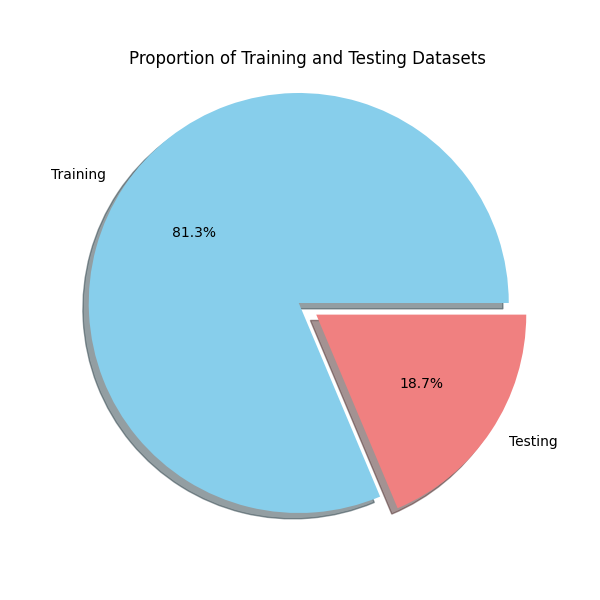

In [8]:
train_size = len(training_images)
test_size = len(testing_images)

sizes = [train_size, test_size]
labels = ['Training', 'Testing']
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of Training and Testing Datasets")
plt.axis('equal')
plt.savefig('pie-00.png')
plt.close()
with open("pie-00.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


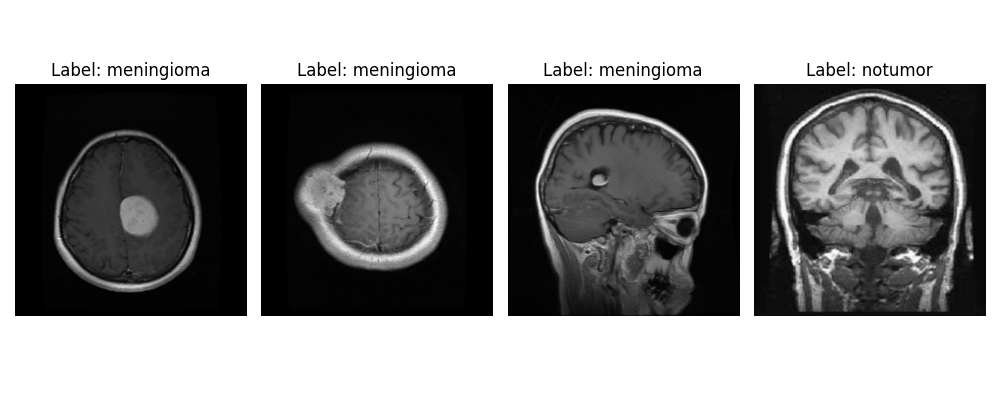

In [9]:
num_images_to_display = 4
random_indices = np.random.choice(len(training_images), size=num_images_to_display, replace=False)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 4))

for i, index in enumerate(random_indices):
    image = training_images[index]
    label = training_labels[index]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('output_images.png')
plt.close()
with open("output_images.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


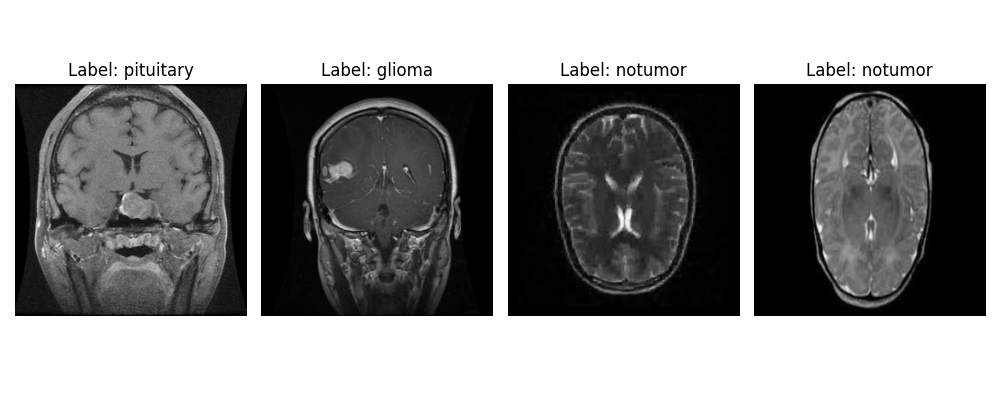

In [10]:
num_images_to_display = 4
random_indices = np.random.choice(len(testing_images), size=num_images_to_display, replace=False)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 4))

for i, index in enumerate(random_indices):
    image = testing_images[index]
    label = testing_labels[index]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('output_images.png')
plt.close()
with open("output_images.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''

display(HTML(html_code))



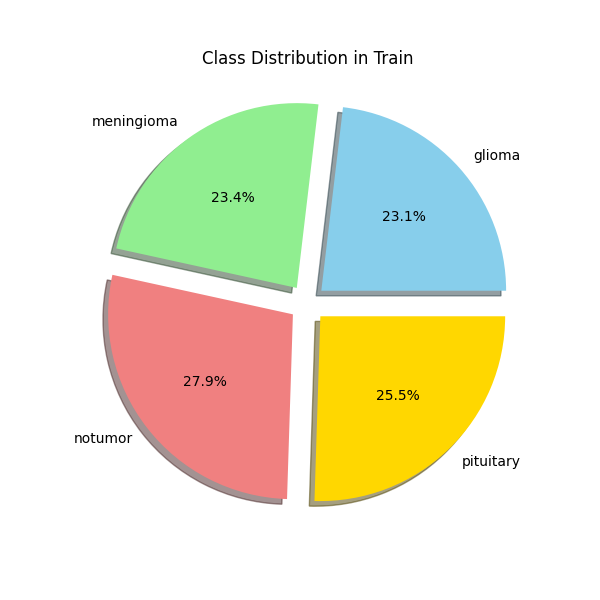

In [11]:
unique_labels, label_counts = np.unique(training_labels, return_counts=True)

plt.figure(figsize=(6, 6))
explode = [0.1] * len(unique_labels)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
shadow = True

plt.pie(label_counts, labels=unique_labels, explode=explode, autopct='%1.1f%%', colors=colors, shadow=shadow)
plt.title("Class Distribution in Train")
plt.savefig('output_pie_chart.png')
plt.close()

with open("output_pie_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''

display(HTML(html_code))



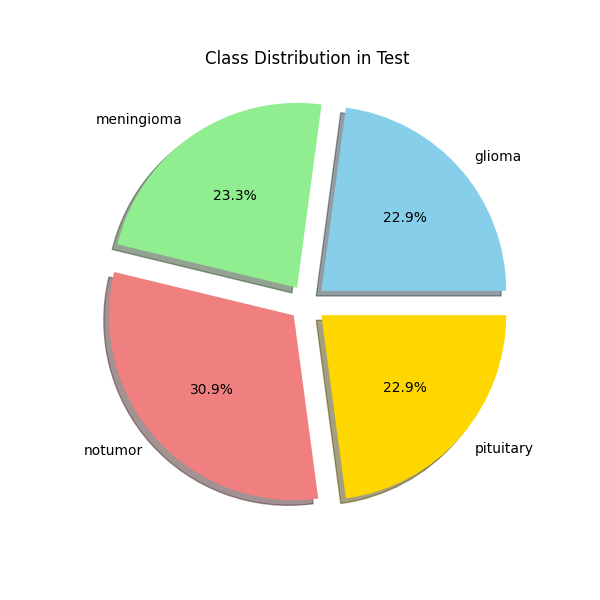

In [12]:
unique_labels, label_counts = np.unique(testing_labels, return_counts=True)

plt.figure(figsize=(6, 6))
explode = [0.1] * len(unique_labels)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
shadow = True

plt.pie(label_counts, labels=unique_labels, explode=explode, autopct='%1.1f%%', colors=colors, shadow=shadow)
plt.title("Class Distribution in Test")
plt.savefig('output_pie_chart.png')
plt.close()
with open("output_pie_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [13]:
testing_indices = np.random.permutation(testing_images.shape[0])
testing_images = testing_images[testing_indices] / 255.0
testing_labels = testing_labels[testing_indices]

training_indices = np.random.permutation(training_images.shape[0])
training_images = training_images[training_indices] / 255.0
training_labels = training_labels[training_indices]

print(testing_images.shape, testing_labels.shape)
print(training_images.shape, training_labels.shape)

(1311, 256, 256) (1311,)
(5712, 256, 256) (5712,)


In [14]:
print("----------------------")
print(training_images[0])
print(training_labels[0])
print("----------------------")
print(testing_images[0])
print(testing_labels[0])
print("----------------------")

----------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
glioma
----------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
notumor
----------------------


In [15]:
train_images = np.squeeze(training_images)
train_images = np.expand_dims(train_images, axis=-1)
test_images  = np.squeeze(testing_images)
test_images  = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape )

(5712, 256, 256, 1)
(1311, 256, 256, 1)


In [16]:
train_labels = np.squeeze(training_labels)
test_labels  = np.squeeze(testing_labels)
print(train_labels.shape,test_labels.shape)

(5712,) (1311,)


In [17]:
print(train_images.shape,test_images.shape)

(5712, 256, 256, 1) (1311, 256, 256, 1)


In [18]:
label_encoder        = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded  = label_encoder.transform(test_labels)

num_classes          = len(label_encoder.classes_)
train_labels_onehot  = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_onehot   = to_categorical(test_labels_encoded , num_classes=num_classes)

In [19]:
print(train_labels_encoded.shape)
print(test_labels_encoded.shape)

(5712,)
(1311,)


In [20]:
print(train_labels_onehot.shape)
print(test_labels_onehot.shape)

(5712, 4)
(1311, 4)


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>BUILD/TRAIN MODEL</b></h2>
</div>

In [21]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
num_labels = 4
model.add(layers.Dense(num_labels, activation='softmax'))
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0


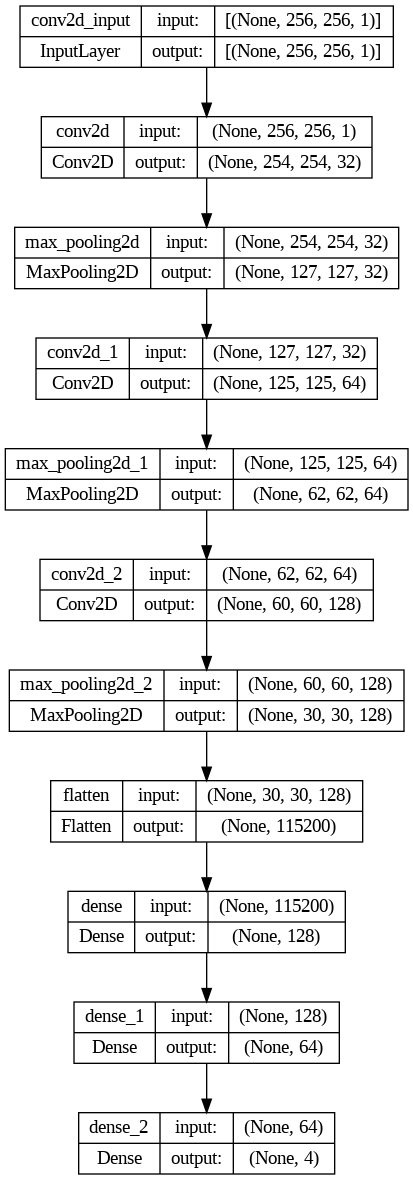

In [22]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)
with open("model_plot.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.0,
    horizontal_flip=True
)

datagen.fit(train_images)
train_generator = datagen.flow(train_images, train_labels_onehot, batch_size=32)
test_generator  = datagen.flow(test_images , test_labels_onehot , batch_size=32)

In [24]:
print("Train Generator Shape:", train_generator[0][0].shape)
print("Test  Generator Shape:", test_generator[0][0].shape)

Train Generator Shape: (32, 256, 256, 1)
Test  Generator Shape: (32, 256, 256, 1)


In [25]:
model.fit(train_generator, epochs=10,validation_data=test_generator)

Epoch 1/10
179/179 [==============================] - 54s 221ms/step - loss: 0.7640 - accuracy: 0.6765 - val_loss: 0.7779 - val_accuracy: 0.7071
Epoch 2/10
179/179 [==============================] - 40s 226ms/step - loss: 0.4709 - accuracy: 0.8144 - val_loss: 0.4887 - val_accuracy: 0.8024
Epoch 3/10
179/179 [==============================] - 41s 227ms/step - loss: 0.3954 - accuracy: 0.8458 - val_loss: 0.5401 - val_accuracy: 0.7727
Epoch 4/10
179/179 [==============================] - 35s 198ms/step - loss: 0.3485 - accuracy: 0.8624 - val_loss: 0.4735 - val_accuracy: 0.8108
Epoch 5/10
179/179 [==============================] - 40s 224ms/step - loss: 0.2974 - accuracy: 0.8811 - val_loss: 0.3805 - val_accuracy: 0.8436
Epoch 6/10
179/179 [==============================] - 38s 210ms/step - loss: 0.2662 - accuracy: 0.9034 - val_loss: 0.2878 - val_accuracy: 0.8856
Epoch 7/10
179/179 [==============================] - 37s 208ms/step - loss: 0.2418 - accuracy: 0.9105 - val_loss: 0.2809 - val_ac


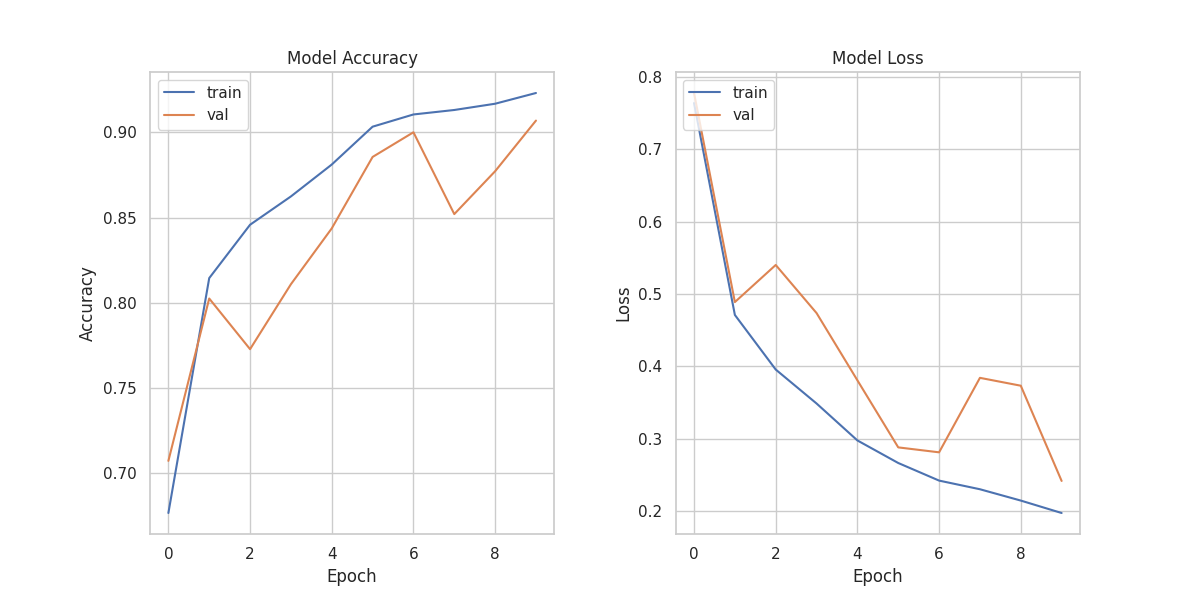

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import base64

sns.set(style="whitegrid")

history = model.history
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['train', 'val'], loc='upper left')
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['train', 'val'], loc='upper left')
plt.subplots_adjust(wspace=0.3)
plt.savefig('combined_plot.png')
plt.close()
with open("combined_plot.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>EVALUATE MODEL</b></h2>
</div>

In [27]:
predictions      = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
target_names     = label_encoder.classes_
print(classification_report(test_labels_encoded, predicted_labels, target_names=target_names))

41/41 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

      glioma       0.91      0.86      0.88       300
  meningioma       0.84      0.81      0.82       306
     notumor       0.92      1.00      0.96       405
   pituitary       0.98      0.97      0.97       300

    accuracy                           0.91      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.91      0.91      0.91      1311

